read csv then draw the blue edge~

2017/7/31

In [2]:
#import
#from astropy.io import fits
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

data_dir = 'C:/Users/1234/OBIC1/'

In [3]:
#read as pandas
import pandas as pd
MS2017_fram = pd.read_csv(data_dir + 'MS2017.csv')
MS2017_fram = MS2017_fram.ix[:,:28]

FileNotFoundError: File b'C:/Users/1234/OBIC1/MS2017.csv' does not exist

In [ ]:
#change logTeff into Teff.
#add [Teff] into DATAFRAME

def tenn(x):
    y=10 ** x
    return y

Teff_tbl = MS2017_fram['logTeff'].apply(tenn)

Teff_fram = pd.DataFrame(Teff_tbl.values,columns=['teff'])
print(Teff_fram)
MS2017_fram_fil = Teff_fram.add(MS2017_fram,fill_value=0)

#yeah!!!!!


In [5]:
#filt the good one
#apogee_tbl_fil = apogee_tbl[np.argwhere(np.logical_and(apogee_tbl['teff'] > 0, apogee_tbl['logg'] > -3))]
#apogee_tbl_fil = apogee_tbl_fil[np.argwhere(np.logical_and(apogee_tbl_fil['j'].flatten() > -1, \
#                                                           apogee_tbl_fil['h'].flatten() > -1))]
#USE goodOB 

MS2017_fram_fil=MS2017_fram_fil[MS2017_fram['goodOB']==1]

MS2017_fram_fil=MS2017_fram_fil[np.logical_and(MS2017_fram_fil['Jmag'].apply(np.floor)> -1,\
                                              MS2017_fram_fil['Hmag'].apply(np.floor)> -1)]

In [6]:
# Determine the input numbers.

# Bin width, usually 50 (for more scatter, try 1000 or other figures)
bin_width = 1000
# Ratio of the bluest edge, usually 5%
ratio = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 20

In [7]:
# input the data of Bessell. M.S. & Brett. J.M. 1988
# BBFrame is the dataframe of the ic data 

BBFrame=pd.DataFrame({'SpectralType':['O9','O9.5','B0','B1','B2','B3','B4'],'V-K':[-0.87,-0.85,-0.83,-0.74,-0.66,-0.56,-0.49],\
                     'J-H':[-0.14,-0.13,-0.12,-0.10,-0.09,-0.08,-0.07],'H-K':[-0.04,-0.04,-0.04,-0.03,-0.03,-0.02,-0.02],\
                     'K-L':[-0.06,-0.06,-0.06,-0.05,-0.05,-0.05,-0.05],'Teff':[35900,34600,31500,25600,22300,19000,17200]})


In [8]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.


#teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
#bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

teff_start = min(MS2017_fram_fil['teff'])-min(MS2017_fram_fil['teff'])%(bin_width / 2)
bin_number = math.ceil((max(MS2017_fram_fil['teff'])-teff_start) / bin_width)


In [9]:
#filt BBFrame
BBFrame_fil=BBFrame[BBFrame['Teff'] > teff_start]


In [10]:
start_time = time.time()
int_teff = []
int_color = []
for i in range(bin_number):
    bin_tbl =MS2017_fram_fil[np.logical_and(MS2017_fram_fil['teff'] > teff_start+i*bin_width, \
                                            MS2017_fram_fil['teff'] < teff_start+(i+1)*bin_width)]
    if len(bin_tbl) < low_crit:
        continue
    source_num = 0
    while source_num != len(bin_tbl):
        source_num = len(bin_tbl)
        bin_mean = np.mean(bin_tbl['Jmag']-bin_tbl['Hmag'])
        bin_sigma = np.std(bin_tbl['Jmag']-bin_tbl['Hmag'])
        bin_tbl = bin_tbl[np.logical_or(bin_tbl['Jmag']-bin_tbl['Hmag'] < bin_mean+3*bin_sigma, \
                                  bin_tbl['Jmag']-bin_tbl['Hmag'] > bin_mean-3*bin_sigma)]
    int_teff.append(float(teff_start+(i+0.5)*bin_width))
    int_color.append(np.median(np.sort(bin_tbl['Jmag']-bin_tbl['Hmag'])[:math.ceil(len(bin_tbl)*ratio/100)]))
print(time.time() - start_time)

0.06116318702697754


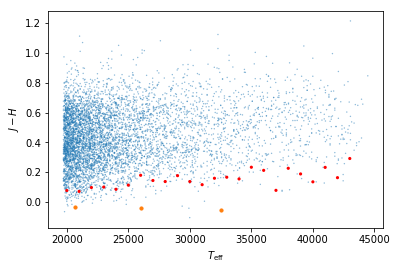

In [17]:
#PLT
plt.scatter(MS2017_fram_fil['teff'], MS2017_fram_fil['Jmag']-MS2017_fram_fil['Hmag'], s=2, edgecolors='None', alpha=0.5)
plt.scatter(int_teff, int_color, c='r', edgecolors='None', s=10)

plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel('$J-H$')

plt.scatter(BBFrame_fil['Teff'],BBFrame_fil['J-H'],s=10)
plt.savefig('2017_7_31.png',dpi=200)
plt.show()

In [12]:
# output the intrinsic colors to a csv.

MS2017_ic=pd.DataFrame({'int_teff':int_teff,'int_color':int_color})

MS2017_ic.to_csv('D:\DATA\OBIC\MS2017ic.csv')

print(MS2017_ic)

    int_color  int_teff
0      0.0780   20000.0
1      0.0720   21000.0
2      0.0980   22000.0
3      0.1010   23000.0
4      0.0860   24000.0
5      0.1140   25000.0
6      0.1800   26000.0
7      0.1450   27000.0
8      0.1380   28000.0
9      0.1775   29000.0
10     0.1380   30000.0
11     0.1170   31000.0
12     0.1600   32000.0
13     0.1670   33000.0
14     0.1555   34000.0
15     0.2340   35000.0
16     0.2130   36000.0
17     0.0790   37000.0
18     0.2270   38000.0
19     0.1890   39000.0
20     0.1360   40000.0
21     0.2330   41000.0
22     0.1640   42000.0
23     0.2925   43000.0


In [59]:
# output BBFrame
BBFrame.to_csv('D:\DATA\OBIC\Bessell&Brett1988.csv')